IMPORT ALL THE LIBRARIES REQUIRED

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor  

In [3]:
! pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.7 MB 2.1 MB/s eta 0:00:49
   ---------------------------------------- 1.0/101.7 MB 2.1 MB/s eta 0:00:49
    --------------------------------------- 1.6/101.7 MB 2.1 MB/s eta 0:00:48
    --------------------------------------- 1.8/101.7 MB 2.1 MB/s eta 0:00:47
    --------------------------------------- 2.4/101.7 MB 2.1 MB/s eta 0:00:47
   - -------------------------------------- 2.9/101.7 MB 2.1 MB/s eta 0:00:47
   - -------------------------------------- 3.1/101.7 MB 2.1 MB/s eta 0:00:46
   - -------------------------------------- 3.7/101.7 MB 2.1 MB/s eta 0:00:47
   - -------------------------------------- 3.9/101.7 MB 2.1 MB/s eta 0:00:48
   - -------------------------------------- 4.5/101.7 MB 2.1 MB/s eta 0:00:47
   - -------------------------------------- 4.7/101.7 MB 2.1 MB/s eta 0:00:47


In [5]:
! pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 1.3 MB/s eta 0:01:33
   ---------------------------------------- 0.8/124.9 MB 1.3 MB/s eta 0:01:33
   ---------------------------------------- 1.0/124.9 MB 1.3 MB/s eta 0:01:34
    --------------------------------------- 1.6/124.9 MB 1.4 MB/s eta 0:01:32
    --------------------------------------- 1.8/124.9 MB 1.4 MB/s eta 0:01:27
    --------------------------------------- 2.1/124.9 MB 1.5 MB/s eta 0:01:24
    --------------------------------------- 2.6/124.9 MB 1.5 MB/s eta 0:01:23
    --------------------------------------- 2.9/124.9 MB 1.5 MB/s eta 0:01:21
   - -------------------------------------- 3.4/124.9 MB 1.6 MB/s eta 0:01:15
   - -------------------------------------- 3.9/124.9 MB 1.7 MB/s eta 0:01:13
   - --

In [7]:
df=pd.read_csv("data/exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


Creating independent and dependent features

In [8]:
X=df.drop(['math score'],axis=1)
y=df['math score']

In [9]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group D,some college,standard,completed,70,78
1,male,group D,associate's degree,standard,none,93,87
2,female,group D,some college,free/reduced,none,76,77
3,male,group B,some college,free/reduced,none,70,63
4,female,group D,associate's degree,standard,none,85,86
...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,71
996,male,group C,some college,standard,none,66,66
997,female,group A,high school,standard,completed,86,86
998,male,group E,high school,standard,none,72,62


In [10]:
y

0      59
1      96
2      57
3      70
4      83
       ..
995    77
996    80
997    67
998    80
999    58
Name: math score, Length: 1000, dtype: int64

In [15]:
print("categorical features in 'gender' are"  , end= "  ")
print(df['gender'].unique())

print("categoris in 'race/ethnicity' are ",  end= " ")
print(df['race/ethnicity'].unique())

print("categories in 'lunch' are ",  end=" ")
print(df['lunch'].unique())

print("catogry in 'parental level of education' are", end=" ")
print(df['parental level of education'].unique())

print("category in 'test preparation course' are"  ,end=" ")
print(df['test preparation course'].unique())

categorical features in 'gender' are  ['female' 'male']
categoris in 'race/ethnicity' are  ['group D' 'group B' 'group C' 'group E' 'group A']
categories in 'lunch' are  ['standard' 'free/reduced']
catogry in 'parental level of education' are ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
category in 'test preparation course' are ['completed' 'none']


In [16]:
y

0      59
1      96
2      57
3      70
4      83
       ..
995    77
996    80
997    67
998    80
999    58
Name: math score, Length: 1000, dtype: int64

In [26]:
# performing train test split before feature encoding to avoid Data lekage
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [28]:
## Feature encoding
num_feature= X_train.select_dtypes(exclude='object').columns
cat_feature= X_train.select_dtypes(include='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numbers=StandardScaler()
category=OneHotEncoder(drop='first')
preprocessing =ColumnTransformer( 
        [
("scaling",numbers,num_feature),
("categories",category,cat_feature)
        ]
)


In [29]:
X_train=preprocessing.fit_transform(X_train)

In [31]:
X_test=preprocessing.transform(X_test)

In [32]:
X_train

array([[-1.68359941, -1.755719  ,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.48382508,  0.53480452,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.39274503,  1.3855704 ,  0.        , ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 0.48382508,  0.40391746,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.97324351,  1.25468334,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.07551027, -0.38140489,  1.        , ...,  0.        ,
         1.        ,  1.        ]])

In [33]:
X_test

array([[ 0.06432357,  0.07669982,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41390816,  0.73113511,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.2640979 , -0.70862253,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.63484563, -0.643179  ,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.32282811,  1.32012687,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.2041574 ,  0.01125629,  1.        , ...,  0.        ,
         1.        ,  1.        ]])

In [34]:
X_train.shape,X_test.shape

((750, 14), (250, 14))

In [40]:
## Evaluating the model performance
def evaluate(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    score=r2_score(true,predicted)
    return mae,mse,score

In [63]:
#   Model Training
models={
    "LinearRegression":LinearRegression(),
    "lasso":Lasso(),
    "ridge":Ridge(),
    "SVM":SVR(),
    "KNN":KNeighborsRegressor(),
    "Decision":DecisionTreeRegressor(),
    "random":RandomForestRegressor(),
    "adaboost":AdaBoostRegressor(),
    "catboost":CatBoostRegressor(verbose=False),
    "xgboost":XGBRegressor()
    
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    # prediction 
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    model_train_mae,model_train_mse,model_train_score= evaluate(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_score= evaluate(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model train performance")
    print("Mean sqaure error",model_train_mse)
    print("mean absolute error",model_train_mae)
    print("Score",model_train_score)
    print("---------------------------------")
    
    print("model test performance")
    print("mean squared error",model_test_mse)
    print("mean absolute error",model_test_mae)
    print("score",model_test_score)
    r2_list.append(model_test_score)
    print("=="*30)

LinearRegression
Model train performance
Mean sqaure error 29.77597174094855
mean absolute error 4.36813323000223
Score 0.8744602805990891
---------------------------------
model test performance
mean squared error 26.44805256688606
mean absolute error 4.208174104152888
score 0.877585743467744
lasso
Model train performance
Mean sqaure error 45.40766553724888
mean absolute error 5.477467258622804
Score 0.8085548428178673
---------------------------------
model test performance
mean squared error 43.84889775655792
mean absolute error 5.229178933575368
score 0.7970462965069669
ridge
Model train performance
Mean sqaure error 29.780848347237022
mean absolute error 4.36776379996089
Score 0.8744397201354237
---------------------------------
model test performance
mean squared error 26.472021519614273
mean absolute error 4.2067518575642495
score 0.8774748036728135
SVM
Model train performance
Mean sqaure error 46.07703251393959
mean absolute error 5.01884837724564
Score 0.8057326967209718
-----

In [57]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2_Score']).sort_values(by=['R2_Score'],ascending=False).reset_index(drop=True)

,Model name,R2_Score
0,LinearRegression,0.877586
1,ridge,0.877475
2,catboost,0.862003
3,random,0.854839
4,adaboost,0.826160
5,xgboost,0.810915
6,lasso,0.797046
7,SVM,0.795453
8,KNN,0.779727
9,Decision,0.720384


In [58]:
regression=LinearRegression()
regression.fit(X_train,y_train)
y_pred=regression.predict(X_test)
score=r2_score(y_test,y_pred)
print("Accuracy_Score of the model is",score)

Accuracy_Score of the model is 0.877585743467744


Plotting

Text(0, 0.5, 'Predicted')

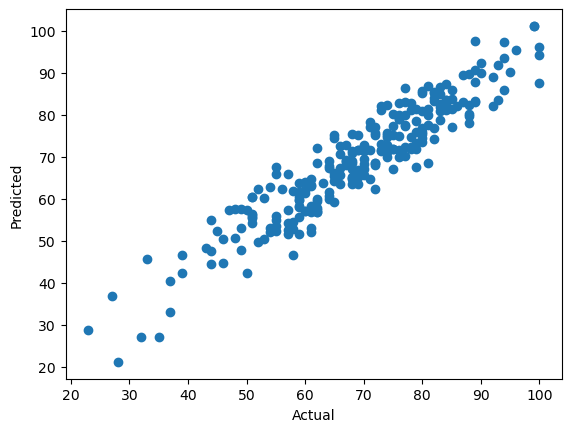

In [60]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")


<Axes: xlabel='math score'>

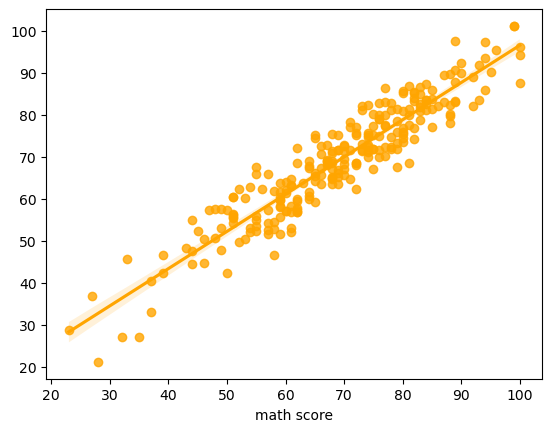

In [61]:
sns.regplot(x=y_test,y=y_pred,color='orange')

In [62]:
pd.DataFrame({"Actual":y_test,"predicted":y_pred,"Difference":y_test-y_pred})

,Actual,predicted,Difference
521,67,68.010323,-1.010323
737,78,81.147853,-3.147853
740,39,42.291839,-3.291839
660,70,69.419272,0.580728
411,90,89.790952,0.209048
...,...,...,...
109,88,89.674232,-1.674232
430,79,81.388087,-2.388087
77,55,67.570681,-12.570681
84,73,82.133632,-9.133632
